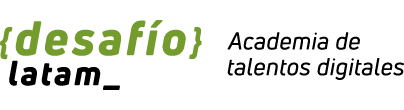

<center><h1> <font color='green'>Solución Desafío - Estadística descriptiva y probabilidades I</font></h1></center>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('ds_salaries.csv',delimiter=',')
df

work_year experience_level employment_type                 job_title   
0          2023               SE              FT  Principal Data Scientist  \
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio   
0       80000             EUR          85847                 ES           100  \
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 11 columns]

- El promedio general de los salarios, desviación estándar, quintiles y rango. (hint: escoge la columna adecuada para comparar)

In [ ]:
promedio = df['salary_in_usd'].mean()
desviacion_estandar = df['salary_in_usd'].std()
quintil1 = df['salary_in_usd'].quantile(0.2)
quintil2 = df['salary_in_usd'].quantile(0.4)
quintil3 = df['salary_in_usd'].quantile(0.6)
quintil4 = df['salary_in_usd'].quantile(0.8)
rango=df['salary_in_usd'].max()-df['salary_in_usd'].min()

print(f'Promedio: {promedio}')
print(f'Desviación estándar: {desviacion_estandar}')
print(f'Quintil 1: {quintil1}')
print(f'Quintil 2: {quintil2}')
print(f'Quintil 3: {quintil3}')
print(f'Quintil 4: {quintil4}')
print(f'Rango: {rango}')

Promedio: 137570.38988015978
Desviación estándar: 63055.6252782241
Quintil 1: 83972.8
Quintil 2: 120000.0
Quintil 3: 149850.0
Quintil 4: 185900.0
Rango: 444868


Una comparación entre los salarios considerando:
- el nivel de experiencia
- la proporción del trabajo realizado a distancia
- el tamaño de la compañía

Debes realizar 3 comparaciones diferentes y analizar en cada caso los promedios de salario. Identifica en cada caso el grupo que presenta mayor y menor dispersión. ¿Se puede extraer alguna conclusión, en cada comparación? Justifica

In [ ]:
comparacion1 = pd.pivot_table(df, values=['salary_in_usd'], index='experience_level', aggfunc=['mean', 'std', 'max', 'min'])
comparacion2 = pd.pivot_table(df, values=['salary_in_usd'], index='remote_ratio', aggfunc=['mean', 'std', 'max', 'min'])
comparacion3 = pd.pivot_table(df, values=['salary_in_usd'], index='company_size', aggfunc=['mean', 'std', 'max', 'min'])

print(comparacion1)

                           mean           std           max           min
                  salary_in_usd salary_in_usd salary_in_usd salary_in_usd
experience_level                                                         
EN                 78546.284375  52225.424309        300000          5409
EX                194930.929825  70661.929661        416000         15000
MI                104525.939130  54387.685128        450000          5132
SE                153051.071542  56896.263954        423834          8000


 Podemos observar, en este caso, que a mayor experiencia aumenta el promedio de los sueldos, aunque también aumenta la dispersión de los mismos (salvo para el caso de los senior, quedisminuye respecto de los experimentados). Si bien los máximos aumentan, los mínimos presentan un comportamiento extraño, aunque puede deberse a valores atípicos.


In [ ]:
print(comparacion2)

                       mean           std           max           min
              salary_in_usd salary_in_usd salary_in_usd salary_in_usd
remote_ratio                                                         
0             144316.202288  59799.970864        450000          5882
50             78400.687831  61326.133522        423000          5409
100           136481.452830  63373.507699        416000          5132


En este caso, no se puede establecer una relación clara tipo "a mayor trabajo online, mayor salario promedio" o viceversa pero sí se observa que los salarios máximos y mínimos disminuyen a medida que aumenta el porcentaje de trabajo online, y aumenta la dispersión. Quizás la indefinición del porcentaje 50 explique un sueldo más bajo en promedio.

In [ ]:
print(comparacion3)

                       mean           std           max           min
              salary_in_usd salary_in_usd salary_in_usd salary_in_usd
company_size                                                         
L             118300.982379  75832.391505        423834          5409
M             143130.548367  58992.813382        450000          5132
S              78226.682432  61955.141792        416000          5679


Se observa que tampoco en este caso hay una relación directa entre el tamaño de la empresa y el aumento de los sueldos: las empresas pequeñas tienen sueldos promedio menores pero los mayores sueldos se observan en las empresas de tamaño mediano, tanto en promedio (que además presenta baja dispersión) como en salario máximo.

Si se analiza con más detalle, además, los salarios de las empresas pequeñas, se aprecia una desviación estándar baja, pero el promedio dista mucho de los valores extremos. Esto nos hace pensar que en estas compañias existen valores atípicos, asociados a salarios bastante altos, pero el grueso de los trabajadores percibe sueldos similares entre sí.

In [ ]:
¿Cuáles son los 5 cargos reciben mejores sueldos promedio en las empresas con sede en Estados Unidos?

In [ ]:
filtro = df[df['company_location'] == 'US']
sueldo_promedio = filtro.groupby('job_title')['salary_in_usd'].mean()
sueldo_promedio_orden=sueldo_promedio.sort_values(ascending=False)
sueldo_promedio_orden.head(5)

job_title
Data Analytics Lead         405000.0
Data Science Tech Lead      375000.0
Director of Data Science    294375.0
Principal Data Scientist    255500.0
Cloud Data Architect        250000.0
Name: salary_in_usd, dtype: float64